In [15]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [16]:
# Load the Financial news dataset
news_data = pd.read_csv("../data/Raw_analyst_ratings.csv")

# View structure of the data
print(news_data.info())
print(news_data.head())

news_data = news_data.dropna(subset=['headline', 'stock'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


C:\Users\bksam\AppData\Local\Temp\ipykernel_6832\4014093008.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


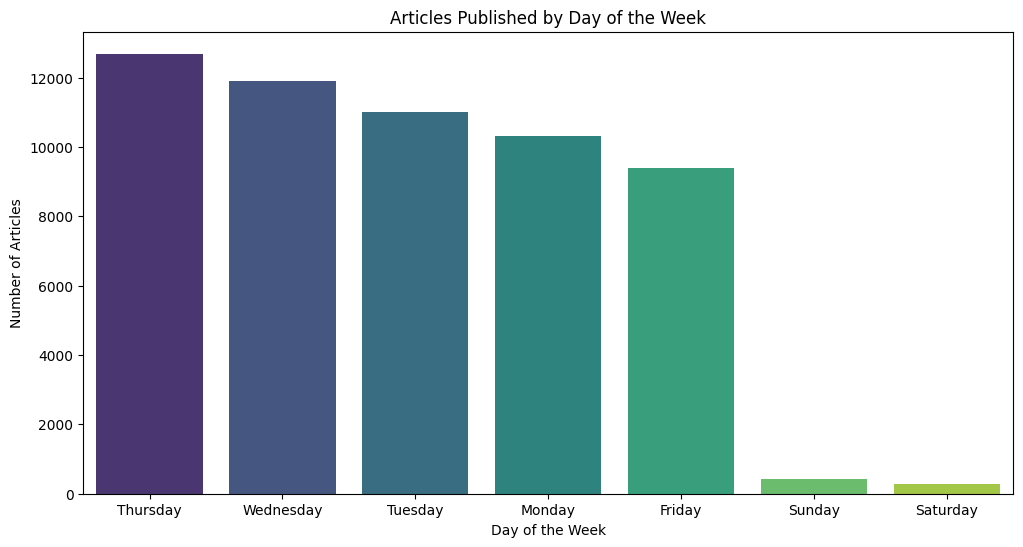

In [24]:
# Headline length
news_data['headline_length'] = news_data['headline'].apply(len)
print(news_data['headline_length'].describe())

# Articles per publisher
publisher_counts = news_data['publisher'].value_counts()
print("Articles per Publisher:")
print(publisher_counts)

# Ensure the 'date' column is in datetime format
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

# Drop rows with invalid dates (if any)
news_data = news_data.dropna(subset=['date'])

# Analyze publication frequency by day of the week
news_data['day_of_week'] = news_data['date'].dt.day_name()
day_counts = news_data['day_of_week'].value_counts()

# Plot distribution of articles by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
plt.title("Articles Published by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.show()


In [21]:
# Perform sentiment analysis
def categorize_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

news_data['sentiment_category'] = news_data['headline'].apply(categorize_sentiment)

# Display sentiment category counts
sentiment_counts = news_data['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

KeyboardInterrupt: 

In [20]:
# Topic Modeling (Common Keywords)
if 'headline' in news_data.columns:
    vectorizer = CountVectorizer(max_features=10, stop_words='english')
    X = vectorizer.fit_transform(news_data['headline'].dropna())
    print("\nTop Keywords:")
    print(vectorizer.get_feature_names_out())
else:
    print("Error: The dataset does not contain a 'headline' column.")


Top Keywords:
['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


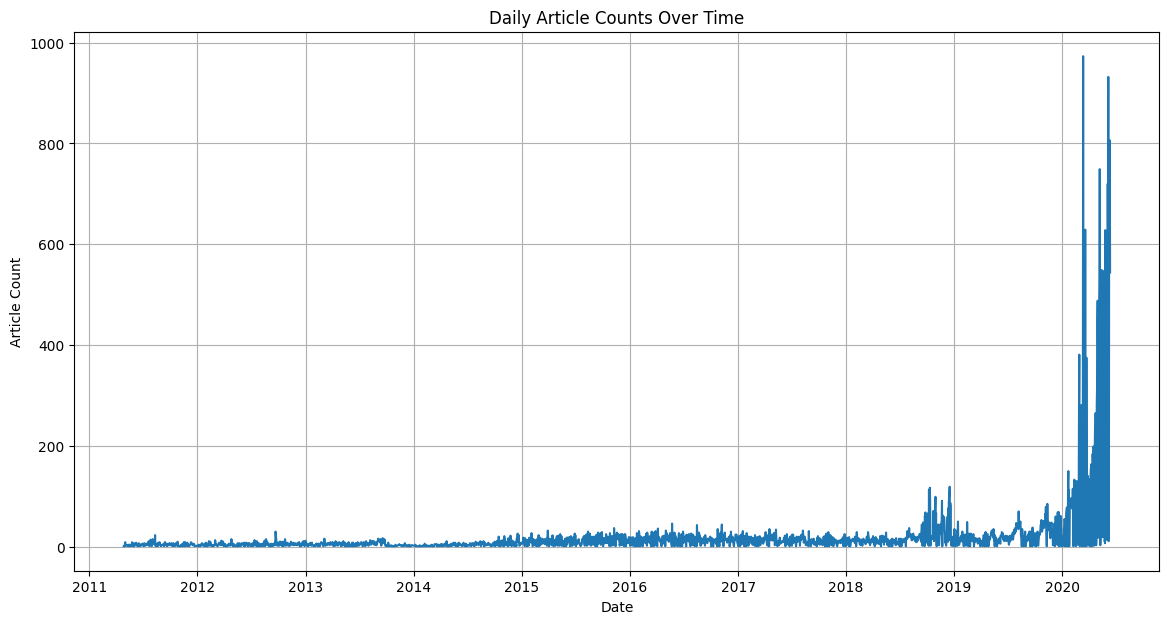

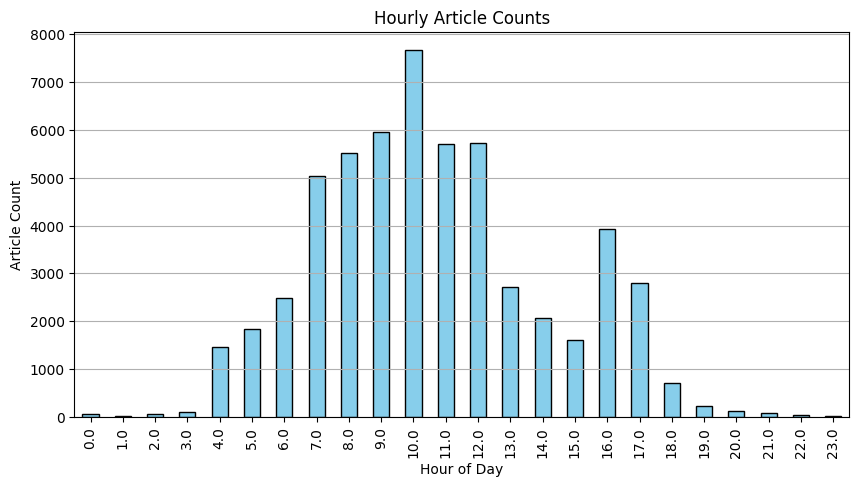

In [14]:
# Convert date column to datetime
news_data['date'] = pd.to_datetime(news_data['date'])

# Analysis 1: Daily Article Counts
daily_counts = news_data.groupby(news_data['date'].dt.date).size()

# Plot: Daily Article Counts Over Time
plt.figure(figsize=(14, 7))
daily_counts.plot()
plt.title("Daily Article Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid()
plt.show()

# Analysis 2: Publishing Times (Hourly Trends)
news_data['hour'] = news_data['date'].dt.hour
hourly_counts = news_data.groupby('hour').size()

# Plot: Hourly Article Counts
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Hourly Article Counts")
plt.xlabel("Hour of Day")
plt.ylabel("Article Count")
plt.grid(axis='y')
plt.xticks(range(24))
plt.show()

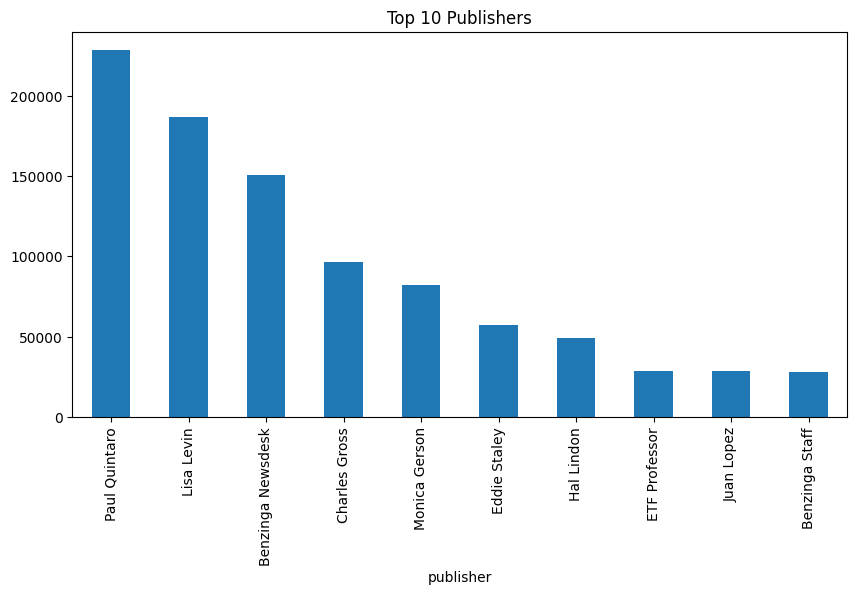

domain
Paul Quintaro            228373
Lisa Levin               186979
Benzinga Newsdesk        150484
Charles Gross             96732
Monica Gerson             82380
                          ...  
Fred Wilson                   1
Union Square Ventures         1
Sumit Mehta                   1
David Wenger                  1
ProactiveInvestors            1
Name: count, Length: 1024, dtype: int64


In [19]:
# Top publishers
top_publishers = news_data['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', title="Top 10 Publishers", figsize=(10, 5))
plt.show()

# Analyze domains if email addresses are used as publishers
news_data['domain'] = news_data['publisher'].str.split('@').str[-1]
domain_counts = news_data['domain'].value_counts()
print(domain_counts)
